In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_all = pd.read_csv(r'./snp_allstocks_2015_2019.csv', index_col=0)
df_info = pd.read_csv(r'./snp_info.csv', index_col=0)
df_all.index = pd.to_datetime(df_all.index, format='%Y-%m-%d')
df_all

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,164.059998,44.900002,65.889999,37.310001,88.839996,20.129999,72.339996,2.670000,158.559998,13.70,...,118.013245,146.889999,36.119999,36.231884,43.599998,38.080002,52.012939,112.589996,28.290001,43.310001
2015-01-05,160.360001,44.910000,64.650002,37.070000,87.339996,19.850000,71.980003,2.660000,156.470001,13.31,...,117.165565,144.389999,35.709999,35.441372,42.799999,35.709999,50.956146,116.790001,27.230000,43.049999
2015-01-06,158.649994,44.400002,64.330002,36.130001,86.709999,19.480000,70.529999,2.630000,156.360001,13.01,...,116.582779,141.309998,35.900002,34.967060,42.180000,35.500000,50.330696,115.800003,26.190001,42.630001
2015-01-07,159.800003,44.759998,66.930000,37.279999,88.529999,19.059999,71.110001,2.580000,159.720001,13.03,...,118.251656,145.460007,36.209999,35.415020,42.200001,35.779999,51.998562,118.680000,26.440001,43.509998
2015-01-08,163.630005,45.680000,67.629997,38.959999,89.879997,19.250000,72.919998,2.610000,161.119995,13.23,...,119.602646,147.210007,36.630001,36.389988,43.139999,36.049999,52.904385,119.940002,26.809999,44.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,178.619995,65.559998,84.160004,281.079987,133.669998,43.990002,205.160004,16.650000,148.919998,13.82,...,146.610001,92.010002,48.599998,18.920000,79.269997,61.380001,87.019997,97.230003,38.509998,79.279999
2018-12-26,186.259995,69.620003,89.040001,307.440002,139.009995,46.419998,222.949997,17.900000,155.029999,14.28,...,148.860001,99.230003,49.560001,19.700001,85.220001,64.269997,89.989998,102.019997,40.509998,82.919998
2018-12-27,190.699997,70.629997,89.910004,315.670013,140.410004,47.040001,225.139999,17.490000,154.690002,14.29,...,150.850006,98.120003,49.599998,19.680000,84.300003,65.349998,90.959999,101.709999,40.459999,84.330002


In [7]:
df_info

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
1,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
2,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
501,Xylem Inc.,XYL,reports,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,NaN
502,Yum! Brands Inc,YUM,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
503,Zimmer Biomet Holdings,ZBH,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
504,Zions Bancorp,ZION,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [33]:
#question 1

#grouping companies into sectors
#grouped_stock: dict(str': sector, df': companies in each sector )

group_class = df_info.groupby('GICS Sector')
grouped_stock = {}
for sector, companies in group_class:
    grouped_stock[sector] = df_all[list(companies['Symbol'])]

In [37]:
#getting the mean log return for each sector

sector_mean_return = pd.DataFrame()
for sector, companies in grouped_stock.items():
    log_return = companies.ffill().apply(np.log).diff().mean(axis=1).dropna()
    sector_mean_return[sector] = log_return
sector_mean_return

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2015-01-05,-0.022271,-0.016806,-0.009286,-0.047625,-0.022636,-0.007612,-0.025132,-0.015424,-0.023509,0.004059,-0.015606
2015-01-06,-0.012974,-0.011000,-0.001461,-0.015496,-0.018313,-0.007733,-0.010313,-0.014844,-0.003362,0.008197,-0.001581
2015-01-07,-0.003383,0.022966,0.019620,-0.003348,0.011682,0.022123,0.006687,0.010089,0.007844,0.014335,0.011048
2015-01-08,0.018840,0.014425,0.016082,0.026367,0.015999,0.018070,0.021190,0.021016,0.023263,0.004924,0.008338
2015-01-09,-0.003782,-0.012226,-0.009166,-0.004964,0.000438,-0.007509,-0.011019,-0.002102,-0.003290,-0.000983,-0.007887
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.024363,-0.016393,-0.030407,-0.045446,-0.023044,-0.021754,-0.028572,-0.023058,-0.023972,-0.040665,-0.045391
2018-12-26,0.044690,0.050331,0.027817,0.070323,0.045377,0.048632,0.045083,0.049505,0.043144,0.034367,0.016922
2018-12-27,0.000844,0.003479,0.006168,0.003331,0.010773,0.009212,0.011549,0.011282,0.016120,0.001636,0.008514


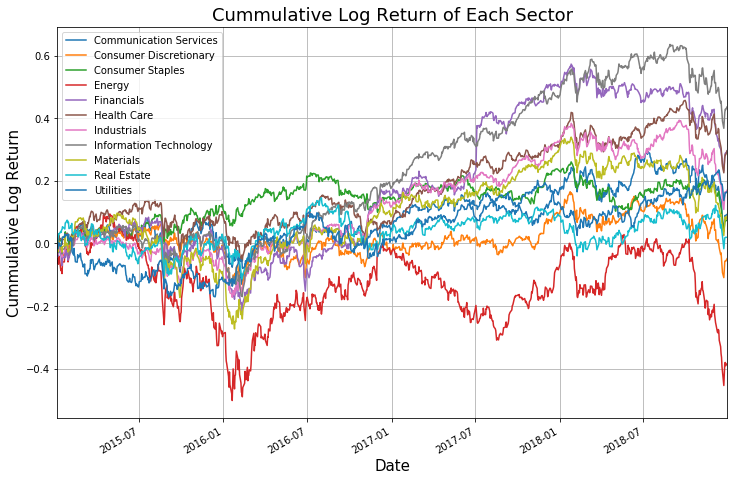

In [461]:
#plotting the cummulative sum of each sector
sector_cummulative_sum = sector_mean_return.cumsum()
sector_cummulative_sum.plot(figsize=(12, 8))
plt.grid()
plt.ylabel("Cummulative Log Return", fontsize = 15)
plt.title("Cummulative Log Return of Each Sector", fontsize = 18)
plt.xlabel("Date", fontsize = 15)

plt.savefig("images//sector_cummulative_sum")

In [227]:
#looking for the stock has the highest cummulative return on average

def sort_order(df):
    mapping = {}
    sorted_df = df.sort_values(inplace = False, ascending = False)
    index = sorted_df.index
    for i in range (0,len(df)):
        mapping[index[i]] = i
    return pd.Series(mapping).sort_index()

def df_sort_order(df):
    temp_output = []
    number_of_row = df.shape[0]
    for row in range (0, number_of_row):
        temp_output.append(sort_order(df.iloc[row]))
    return (pd.DataFrame(temp_output)/df.shape[0]).sum().sort_values()

all_sort_order = df_sort_order(sector_cummulative_sum)
all_sort_order

# all_sort_order gives the average ranking of each sector compared to the other sectors
# eg. Healthcare is on average ranked the highest cummulative return among all the sectors

Health Care               1.790050
Information Technology    2.083582
Consumer Staples          3.040796
Financials                3.467662
Industrials               4.737313
Communication Services    4.949254
Materials                 5.061692
Real Estate               6.368159
Utilities                 6.934328
Consumer Discretionary    7.152239
Energy                    9.414925
dtype: float64

In [224]:
# looking for the stock which is most stable 
# chooe stock which has mostly positive return

(sector_cummulative_sum.gt(0).sum(axis=0)/df.shape[0]*100).sort_values(ascending = False)

# Here we see consumer staples 99.5% of the time has a positive cummulative return meaning its the most stable

Consumer Staples          99.502982
Health Care               97.514911
Communication Services    86.481113
Information Technology    84.890656
Materials                 77.435388
Real Estate               76.938370
Financials                72.962227
Industrials               70.874751
Utilities                 66.500994
Consumer Discretionary    61.332008
Energy                    11.232604
dtype: float64

In [334]:
# Choose Health Care, Information Technology and Consumer Staples
# Start by analysing all the stocks in each chosen sector and take 3 top performing stock from each chosen sector

healthcare_return = grouped_stock["Health Care"].ffill().apply(np.log).diff().dropna()
healthcare_cumsum = healthcare_return.cumsum()

infotech_return = grouped_stock["Information Technology"].ffill().apply(np.log).diff().dropna()
infotech_cumsum = infotech_return.cumsum()

consumer_return = grouped_stock["Consumer Staples"].ffill().apply(np.log).diff().dropna()
consumer_cumsum = consumer_return.cumsum()

communication_return = grouped_stock["Communication Services"].ffill().apply(np.log).diff().dropna()
communication_cumsum = communication_return.cumsum()

finance_return = grouped_stock["Financials"].ffill().apply(np.log).diff().dropna()
finance_cumsum = finance_return.cumsum()

In [335]:
# Choose stocks with high return but low correlation between each other

healthcare_ranking = df_sort_order(healthcare_cumsum)
infotech_ranking = df_sort_order(infotech_cumsum)
consumer_ranking = df_sort_order(consumer_cumsum)
communication_ranking = df_sort_order(communication_cumsum)
finance_ranking = df_sort_order(finance_cumsum)

healthcare_ranking

ABMD     0.572614
HCA      3.514523
EW       6.946058
RMD      7.838174
IDXX     8.066390
          ...    
MCK     53.531120
CAH     54.282158
MYL     54.809129
CELG    55.431535
XRAY    60.112033
Length: 62, dtype: float64

In [336]:
# get summary of correlation to get intuition of the distribution of correlations between all possible pairs of 
# stocks within the same sector

def get_correlation_summary(df, name = ""):
    df_temp = df.corr().stack().reset_index()
    df_temp.columns = ["Stock 1", "Stock 2", "Correlation"]
    
    # drop the self-correlation which are == 1
    df_temp.drop(df_temp[df_temp["Correlation"] == 1].index, inplace = True)
    summary = df_temp.describe()
    summary.columns = [name]
    return summary

healthcare_summary = get_correlation_summary(healthcare_return, "Health Care")
infotech_summary = get_correlation_summary(infotech_return, "Information Technology")
consumer_summary = get_correlation_summary(consumer_return, "Consumer Staples")
communication_summary = get_correlation_summary(communication_return, "Communication Services")
finance_summary = get_correlation_summary(finance_return, "Financials")

correlation_summary = pd.concat([healthcare_summary, infotech_summary, consumer_summary, communication_summary, finance_summary], axis = 1)
correlation_summary

,Health Care,Information Technology,Consumer Staples,Communication Services,Financials
count,3782.000000,4556.000000,1056.000000,650.000000,4556.000000
mean,0.421640,0.399733,0.305278,0.308560,0.597080
std,0.124260,0.099996,0.116791,0.137054,0.126672
min,0.007013,0.120121,0.032583,0.027220,0.078403
25%,0.339348,0.327399,0.219336,0.220901,0.521858
50%,0.417377,0.393653,0.288161,0.279477,0.598892
75%,0.498845,0.462308,0.374277,0.371478,0.685337
max,0.800724,0.876631,0.734325,0.990629,0.932508


In [351]:
# Now we look at the correlation of the stocks with the highest cummulative return (top 10) for each sector
# If the stocks are too correlated, we will choose only the one with the higher return
# Intuition behind "too correlated" can be deduced from the summary above, comparing the correlation to the 
# correlation of all other stocks in general

healthcare_return[healthcare_ranking.iloc[0:10].index].corr()

,ABMD,HCA,EW,RMD,IDXX,BSX,ZTS,ISRG,ILMN,HUM
ABMD,1.000000,0.321079,0.625685,0.456121,0.595400,0.518321,0.513833,0.618545,0.565473,0.321971
HCA,0.321079,1.000000,0.425115,0.324982,0.456980,0.529485,0.488610,0.470236,0.454065,0.432983
EW,0.625685,0.425115,1.000000,0.473391,0.627573,0.572661,0.571713,0.670362,0.648146,0.378275
RMD,0.456121,0.324982,0.473391,1.000000,0.530097,0.525396,0.457241,0.594032,0.531564,0.353146
IDXX,0.595400,0.456980,0.627573,0.530097,1.000000,0.615835,0.629013,0.717784,0.698816,0.416635
BSX,0.518321,0.529485,0.572661,0.525396,0.615835,1.000000,0.635066,0.681290,0.640594,0.453666
ZTS,0.513833,0.488610,0.571713,0.457241,0.629013,0.635066,1.000000,0.584844,0.611466,0.463843
ISRG,0.618545,0.470236,0.670362,0.594032,0.717784,0.681290,0.584844,1.000000,0.724275,0.487239
ILMN,0.565473,0.454065,0.648146,0.531564,0.698816,0.640594,0.611466,0.724275,1.000000,0.420619
HUM,0.321971,0.432983,0.378275,0.353146,0.416635,0.453666,0.463843,0.487239,0.420619,1.000000


In [352]:
infotech_return[infotech_ranking.iloc[0:10].index].corr()

,AMD,NVDA,AMAT,LRCX,AVGO,KLAC,ADSK,ANET,IPGP,GLW
AMD,1.000000,0.436901,0.382220,0.359832,0.295197,0.302496,0.332777,0.288108,0.285068,0.294934
NVDA,0.436901,1.000000,0.542010,0.485837,0.417633,0.433719,0.424984,0.415368,0.359448,0.383506
AMAT,0.382220,0.542010,1.000000,0.838504,0.527319,0.689005,0.497073,0.434167,0.440061,0.480213
LRCX,0.359832,0.485837,0.838504,1.000000,0.508011,0.768501,0.525700,0.414618,0.429826,0.484178
AVGO,0.295197,0.417633,0.527319,0.508011,1.000000,0.429853,0.382352,0.337219,0.350023,0.411429
KLAC,0.302496,0.433719,0.689005,0.768501,0.429853,1.000000,0.437607,0.361586,0.294564,0.431493
ADSK,0.332777,0.424984,0.497073,0.525700,0.382352,0.437607,1.000000,0.469163,0.352653,0.461261
ANET,0.288108,0.415368,0.434167,0.414618,0.337219,0.361586,0.469163,1.000000,0.364941,0.357774
IPGP,0.285068,0.359448,0.440061,0.429826,0.350023,0.294564,0.352653,0.364941,1.000000,0.382847
GLW,0.294934,0.383506,0.480213,0.484178,0.411429,0.431493,0.461261,0.357774,0.382847,1.000000


In [353]:
consumer_return[consumer_ranking.iloc[0:10].index].corr()

,LW,EL,COST,CLX,MNST,STZ,CHD,BF-B,MKC,WMT
LW,1.000000,0.180040,0.216745,0.216726,0.157032,0.237846,0.210414,0.229148,0.271430,0.156731
EL,0.180040,1.000000,0.296877,0.279527,0.258291,0.206047,0.359539,0.329124,0.247611,0.215134
COST,0.216745,0.296877,1.000000,0.282564,0.235999,0.185208,0.270576,0.279337,0.357578,0.460177
CLX,0.216726,0.279527,0.282564,1.000000,0.274454,0.163345,0.720428,0.301871,0.530875,0.302839
MNST,0.157032,0.258291,0.235999,0.274454,1.000000,0.243161,0.288227,0.288487,0.310416,0.272818
STZ,0.237846,0.206047,0.185208,0.163345,0.243161,1.000000,0.189598,0.327811,0.175875,0.140046
CHD,0.210414,0.359539,0.270576,0.720428,0.288227,0.189598,1.000000,0.312941,0.475689,0.255202
BF-B,0.229148,0.329124,0.279337,0.301871,0.288487,0.327811,0.312941,1.000000,0.357214,0.227889
MKC,0.271430,0.247611,0.357578,0.530875,0.310416,0.175875,0.475689,0.357214,1.000000,0.293771
WMT,0.156731,0.215134,0.460177,0.302839,0.272818,0.140046,0.255202,0.227889,0.293771,1.000000


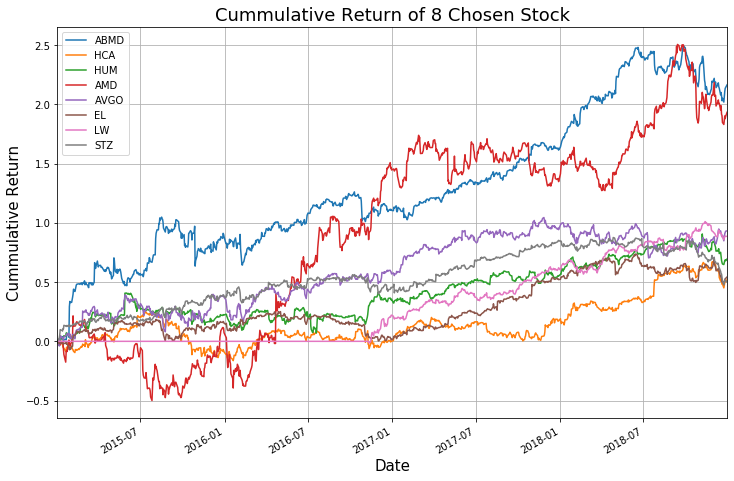

In [456]:
chosen_stocks = ["ABMD", "HCA", "HUM", "AMD", "AVGO", "EL", "LW", "STZ"]
df_chosen_stock = df_all[chosen_stocks]
chosen_stock_return = df_chosen_stock.ffill().apply(np.log).diff().fillna(0)
chosen_stock_return_cumsum = chosen_stock_return.cumsum()

chosen_stock_return_cumsum.plot(figsize = (12,8))
plt.grid()
plt.title("Cummulative Return of 8 Chosen Stock", fontsize = 18)
plt.ylabel("Cummulative Return", fontsize = 15)
plt.xlabel("Date", fontsize = 15)

plt.savefig("images//chosen_stock_cummulative_return")

In [370]:
chosen_stock_return.corr()

,ABMD,HCA,HUM,AMD,AVGO,EL,LW,STZ
ABMD,1.000000,0.243607,0.172734,0.189414,0.278935,0.237274,0.104637,0.251820
HCA,0.243607,1.000000,0.328667,0.191557,0.299671,0.232230,0.089526,0.285997
HUM,0.172734,0.328667,1.000000,0.095141,0.204707,0.157882,0.066254,0.177742
AMD,0.189414,0.191557,0.095141,1.000000,0.282439,0.210468,0.093811,0.109505
AVGO,0.278935,0.299671,0.204707,0.282439,1.000000,0.279596,0.131966,0.267001
EL,0.237274,0.232230,0.157882,0.210468,0.279596,1.000000,0.135583,0.267256
LW,0.104637,0.089526,0.066254,0.093811,0.131966,0.135583,1.000000,0.166336
STZ,0.251820,0.285997,0.177742,0.109505,0.267001,0.267256,0.166336,1.000000


In [493]:
# question 2

def draw_correlation_graph(df, threshold=0.2, figsize=(5, 5)):
    stack = df.corr().stack().reset_index()
    stack.columns = ['Stock 1', 'Stock 2','Correlation']
    
    # drop self correlation
    stack.drop(stack[stack["Correlation"] == 1].index, inplace = True)
    stack.reset_index()
    
    # Since high correlation is non-ideal (low correlation means that we minimise our risks) 
    # we would like to keep a closer eye on the stocks which has high correlation as they are the riskiest
    # Stocks with low correlations are neglected as they will congest the visualisation
    # Hence, we get pairs with correlation > threshold
    # 2nd arguement is redundant, just to drop self correlation
    stack_filtered = stack.loc[(stack['Correlation'] > threshold) & (stack['Stock 1'] != stack['Stock 2'])]
    
    # 1 - stack because we want high correlation nodes to be close and vice versa
    # if not introduced, nodes with high correlation will be far apart and the edges will be longer
    offset = 1 - stack["Correlation"]
    stack["Correlation"] = offset

    graph = nx.from_pandas_edgelist(stack_filtered, 'Stock 1', 'Stock 2')
    plt.figure(figsize=figsize)
    plt.title(f'Plot of correlation with threshold={threshold}', fontsize = 15)
    nx.draw(graph, 
            with_labels=True, 
            node_color='orange', 
            node_size=400, 
            edge_color='black', 
            linewidths=1, 
            font_size=15)
    return plt 

In [449]:
# create global variable: correlation_stack which has variables: Stock1, Stock2, Correlation
# self correlation is removed

correlation_stack = chosen_stock_return.corr().stack().reset_index()
correlation_stack.columns = ['Stock 1', 'Stock 2','Correlation']

# drop self correlation
correlation_stack.drop(correlation_stack[correlation_stack["Correlation"] == 1].index, inplace = True)
correlation_stack.reset_index().describe()

,index,Correlation
count,56.000000,56.000000
mean,31.500000,0.198277
std,18.309461,0.074365
min,1.000000,0.066254
25%,15.750000,0.134679
50%,31.500000,0.198132
75%,47.250000,0.267065
max,62.000000,0.328667


Text(0, 0.5, 'Density')

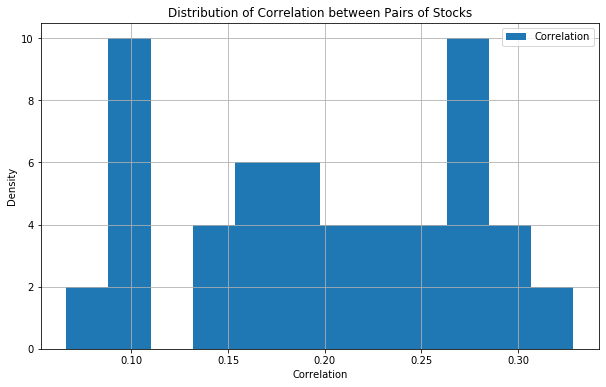

In [490]:
# plot histogram of correlation to get intuition about the distribution of all correlations

correlation_stack.plot.hist(figsize = (10,6), bins = 12)
plt.grid()
plt.title("Distribution of Correlation between Pairs of Stocks")
plt.xlabel("Correlation")
plt.ylabel("Density")

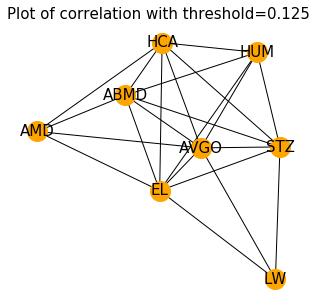

In [501]:
# it is seen that there is a spike in density at about the 0.125 correlation mark
# the threshold is set at 0.125

draw_correlation_graph(chosen_stock_return, threshold=0.125)
plt.savefig("images//correlation_graph_congested")

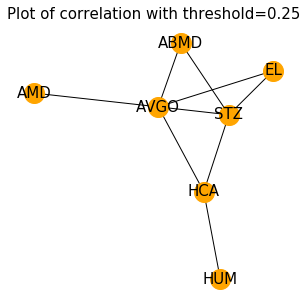

In [502]:
# Figure above is very congested and provide little information for analysis
# it is seen that there is also a spike in density at about the 0.25 correlation mark, hence for better visualisation
# the threshold is set at 0.25

draw_correlation_graph(chosen_stock_return, threshold=0.25)
plt.savefig("images//correlation_graph")

In [460]:
#question4

from sklearn.metrics import mean_squared_error as mse
mse(chosen_stock_return["ABMD"], chosen_stock_return["HCA"])

0.0008574241979677616

In [459]:
chosen_stock_return.columns

Index(['ABMD', 'HCA', 'HUM', 'AMD', 'AVGO', 'EL', 'LW', 'STZ'], dtype='object')

In [504]:
def get_mae_matrix(df):
    mae_matrix = []
    for stock1 in df:
        temp_mae_ls = []
        for stock2 in df:
            temp_mae_ls.append(mse(df[stock1], df[stock2]))
        
        mae_matrix.append(temp_mae_ls)
        
    return pd.DataFrame(mae_matrix, columns = df.columns, index = df.columns)

def draw_mae_graph(df, threshold=0.2, figsize=(5, 5)):
    stack = get_mae_matrix(df).stack().reset_index()
    stack.columns = ['Stock 1', 'Stock 2','MAE']
    
    # drop self MAE calculation
    stack.drop(stack[stack["MAE"] == 0].index, inplace = True)
    stack.reset_index()
    
    # Since low mae is non-ideal (low mae means that the stocks are similar) 
    # we would like to keep a closer eye on the stocks which has low mae as they are the riskiest
    # Stocks with high mae are neglected as they will congest the visualisation
    # Hence, we get pairs with mae < threshold
    # 2nd arguement is redundant, just to drop self mae
    stack_filtered = stack.loc[(stack['MAE'] < threshold) & (stack['Stock 1'] != stack['Stock 2'])]
    
    # Notice that we do not have the offset here per correlation as we want to cluster stocks with low mae together
    # as they exhibit similar behaviour
    
    offset = stack["MAE"]*100
    stack["MAE"] = offset

    graph = nx.from_pandas_edgelist(stack_filtered, 'Stock 1', 'Stock 2')
    plt.figure(figsize=figsize)
    plt.title(f'Plot of correlation with threshold={threshold}', fontsize = 15)
    nx.draw(graph, 
            with_labels=True, 
            node_color='orange', 
            node_size=400, 
            edge_color='black', 
            linewidths=1, 
            font_size=15)
    return plt

In [480]:
get_mae_matrix(chosen_stock_return)

,ABMD,HCA,HUM,AMD,AVGO,EL,LW,STZ
ABMD,0.000000,0.000857,0.000920,0.002039,0.000916,0.000821,0.000848,0.000804
HCA,0.000857,0.000000,0.000355,0.001677,0.000493,0.000351,0.000325,0.000320
HUM,0.000920,0.000355,0.000000,0.001802,0.000554,0.000381,0.000328,0.000364
AMD,0.002039,0.001677,0.001802,0.000000,0.001617,0.001619,0.001680,0.001725
AVGO,0.000916,0.000493,0.000554,0.001617,0.000000,0.000459,0.000464,0.000460
EL,0.000821,0.000351,0.000381,0.001619,0.000459,0.000000,0.000240,0.000269
LW,0.000848,0.000325,0.000328,0.001680,0.000464,0.000240,0.000000,0.000223
STZ,0.000804,0.000320,0.000364,0.001725,0.000460,0.000269,0.000223,0.000000


In [484]:
# create global variable: mae_stack which has variables: Stock1, Stock2, MAE
# self MAE is removed

mae_stack = get_mae_matrix(chosen_stock_return).stack().reset_index()
mae_stack.columns = ['Stock 1', 'Stock 2','MAE']

# drop self correlation
mae_stack.drop(mae_stack[mae_stack["MAE"] == 0].index, inplace = True)
mae_stack.reset_index().describe()

,index,MAE
count,56.000000,56.000000
mean,31.500000,0.000818
std,18.309461,0.000578
min,1.000000,0.000223
25%,15.750000,0.000354
50%,31.500000,0.000524
75%,47.250000,0.001094
max,62.000000,0.002039


Text(0, 0.5, 'Density')

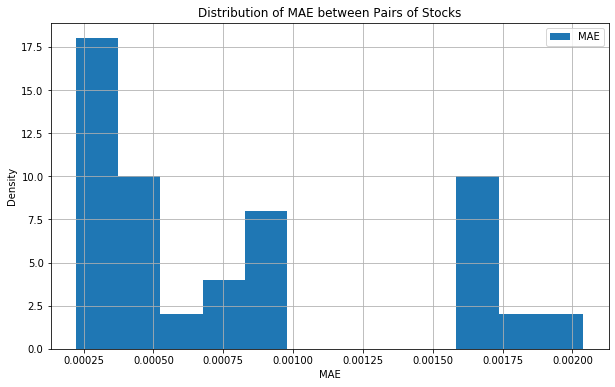

In [491]:
# plot histogram of mae to get intuition about the distribution of all mae

mae_stack.plot.hist(figsize = (10,6), bins = 12)
plt.grid()
plt.title("Distribution of MAE between Pairs of Stocks")
plt.xlabel("MAE")
plt.ylabel("Density")

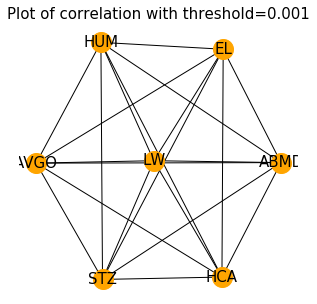

In [505]:
# The same intuition applies from plotting the correlation graph
# It is seen that there is a spike in density with mae < 0.001, we first plot this graph and reduce the threshold
# if it is still too congested

draw_mae_graph(chosen_stock_return, threshold=0.001)
plt.savefig("images//mae_graph_congested")

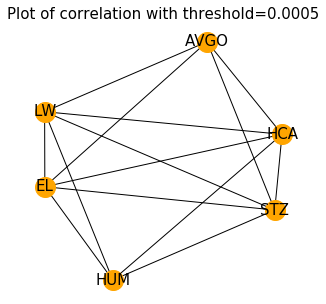

In [506]:
draw_mae_graph(chosen_stock_return, threshold=0.0005)
plt.savefig("images//mae_graph_congested")

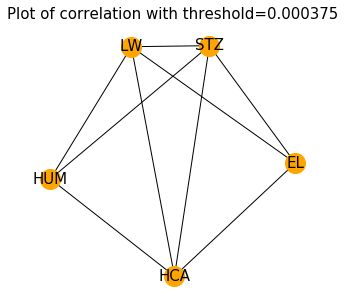

In [507]:
draw_mae_graph(chosen_stock_return, threshold=0.000375)
plt.savefig("images//mae_graph_congested")